In [3]:
import mnist_util as mu
import numpy as np


# importing training images and test images
X_train, Y_train, X_test, Y_test = mu.get_np_array()




In [4]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', Y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', Y_test.shape)


Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [5]:
#use less data = less waiting for testing
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
Y_train = Y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
Y_test = Y_test[mask]

In [6]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 784) (500, 784)


In [7]:

from classifier.k_nearest_neighbor import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, Y_train)

In [8]:
dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)

(500, 5000)


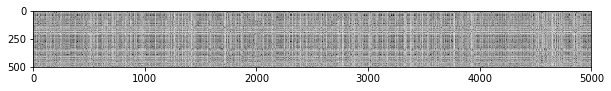

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(dists, interpolation='none')
plt.show()


In [10]:
Y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(Y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 453 / 500 correct => accuracy: 0.906000


(233, 784)


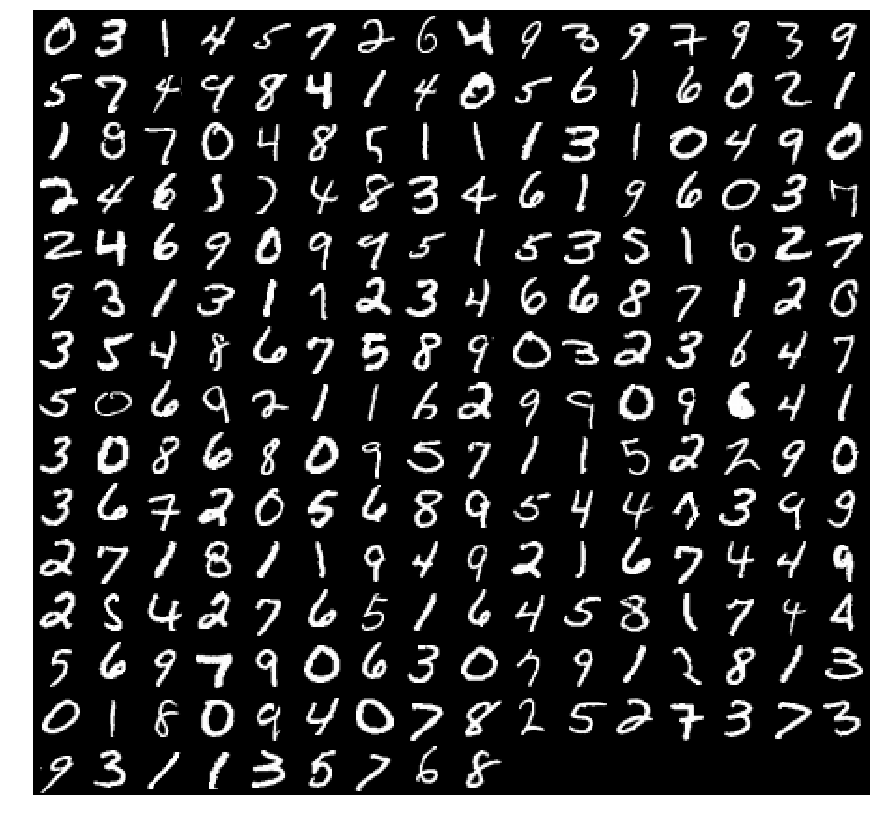

In [66]:
#print images predicted wrong
nums=[]
test=[]
for i in range(Y_test.size):
        if(Y_test[i]!=Y_test_pred[i]):
            nums.append(X_train[i])
print(np.array(nums).shape)
mu.show_nums(np.array(nums))

In [49]:
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 50, 100,200,500,1000]
from sklearn.metrics import confusion_matrix
counter=0
cm=np.empty([18,10,10],dtype=np.int32)
for k in k_choices:
    Y_test_pred = classifier.predict_labels(dists, k=k)
    num_correct = np.sum(Y_test_pred == Y_test)
    accuracy = float(num_correct) / num_test
    print('for %d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))
    cm[counter] = confusion_matrix(Y_test, Y_test_pred)
    counter=counter+1

for 1 Got 453 / 500 correct => accuracy: 0.906000
for 2 Got 447 / 500 correct => accuracy: 0.894000
for 3 Got 459 / 500 correct => accuracy: 0.918000
for 4 Got 456 / 500 correct => accuracy: 0.912000
for 5 Got 455 / 500 correct => accuracy: 0.910000
for 6 Got 452 / 500 correct => accuracy: 0.904000
for 7 Got 452 / 500 correct => accuracy: 0.904000
for 8 Got 453 / 500 correct => accuracy: 0.906000
for 9 Got 449 / 500 correct => accuracy: 0.898000
for 10 Got 445 / 500 correct => accuracy: 0.890000
for 12 Got 442 / 500 correct => accuracy: 0.884000
for 15 Got 440 / 500 correct => accuracy: 0.880000
for 20 Got 438 / 500 correct => accuracy: 0.876000
for 50 Got 425 / 500 correct => accuracy: 0.850000
for 100 Got 406 / 500 correct => accuracy: 0.812000
for 200 Got 383 / 500 correct => accuracy: 0.766000
for 500 Got 330 / 500 correct => accuracy: 0.660000
for 1000 Got 267 / 500 correct => accuracy: 0.534000


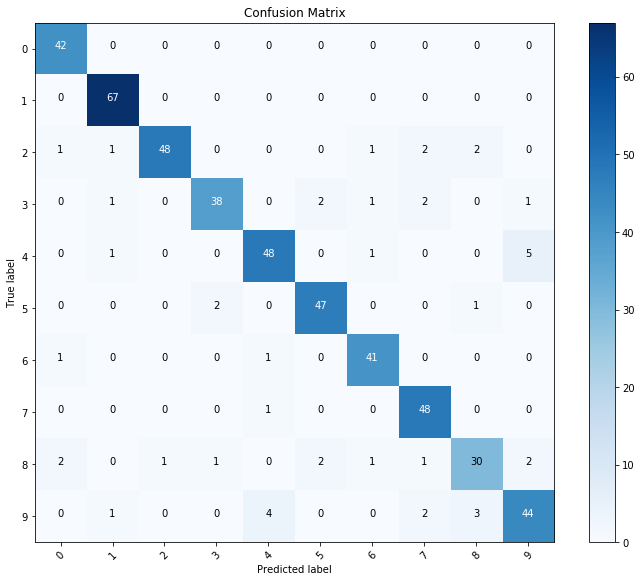

In [57]:
mu.plot_confusion_matrix(cm[0], title='Confusion Matrix',classes=np.arange(10))

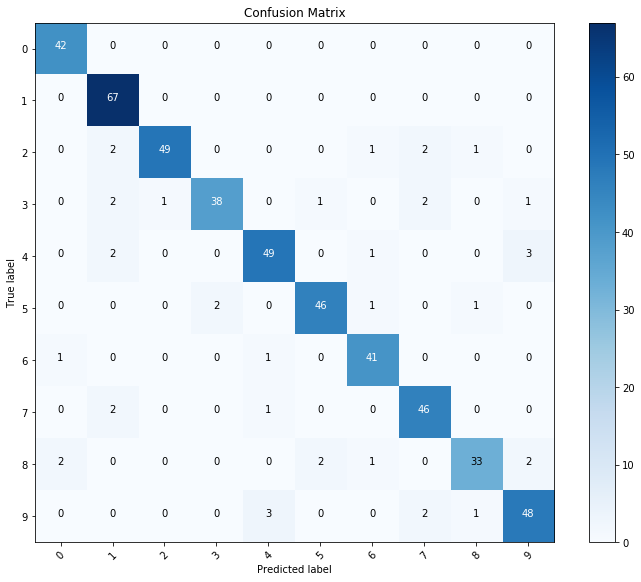

In [55]:
mu.plot_confusion_matrix(cm[2], title='Confusion Matrix',classes=np.arange(10))

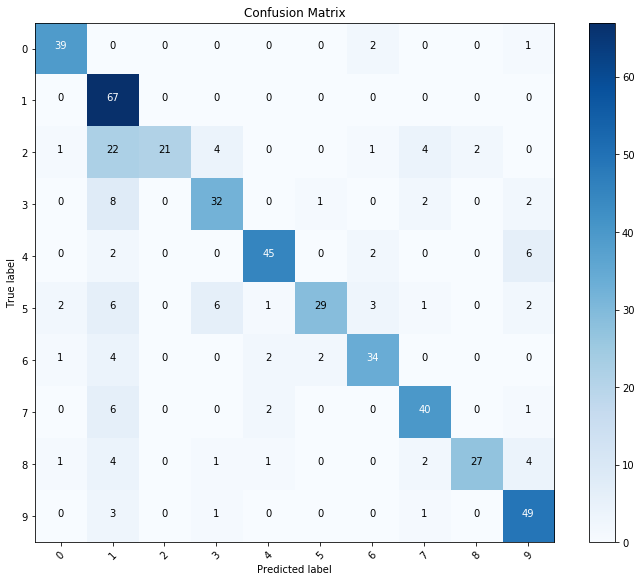

In [68]:
mu.plot_confusion_matrix(cm[15], title='Confusion Matrix',classes=np.arange(10))